In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_feat = scaler.transform(df.drop('TARGET CLASS',  axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [8]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
predictions = knn.predict(X_test)

In [16]:
type(predictions)

numpy.ndarray

In [17]:
np.mean(predictions != y_test)

0.06333333333333334

In [18]:
error_rate = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [19]:
error_rate

[0.06333333333333334,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline()

In [22]:
error_rate = pd.DataFrame(data = error_rate,columns=['error_rate'],index=range(1,51))

In [23]:
error_rate

,error_rate
1,0.063333
2,0.083333
3,0.056667
4,0.056667
5,0.056667
6,0.056667
7,0.063333
8,0.056667
9,0.056667
10,0.050000


In [24]:
error_rate.iplot()

from graph it can be seen that n_neighbors = 12 is the optimal value.

In [25]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print("Error Rate is : {}".format(np.mean(predictions != y_test)))

Error Rate is : 0.04666666666666667


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

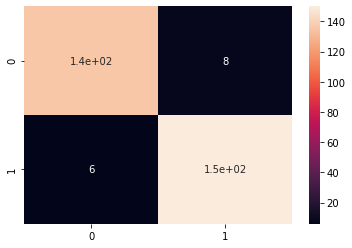

In [31]:
sns.heatmap(confusion_matrix(predictions, y_test),annot=True)

In [32]:
print(confusion_matrix(predictions, y_test))

[[136   8]
 [  6 150]]


In [33]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.95      0.96      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Great